In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Importing modules
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.model_selection import StratifiedKFold

#Evaluation Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [7]:
tech_debt_df = pd.read_csv('/content/drive/My Drive/tech_debt/technical_debt_dataset.csv',header=0,encoding='latin-1')#'utf-8')

In [8]:
len(tech_debt_df)

62275

In [9]:
tech_debt_df['classification'].value_counts()

WITHOUT_CLASSIFICATION    58204
DESIGN                     2703
IMPLEMENTATION              757
DEFECT                      472
TEST                         85
DOCUMENTATION                54
Name: classification, dtype: int64

In [10]:
tech_debt_df.loc[tech_debt_df.classification == "DEFECT",'tag']=int(1)
tech_debt_df.loc[tech_debt_df.classification == "DESIGN",'tag']=int(1)
tech_debt_df.loc[tech_debt_df.classification == "DOCUMENTATION",'tag']=int(1)
tech_debt_df.loc[tech_debt_df.classification == "IMPLEMENTATION",'tag']=int(1)
tech_debt_df.loc[tech_debt_df.classification == "TEST",'tag']=int(1)
tech_debt_df.loc[tech_debt_df.classification == "WITHOUT_CLASSIFICATION",'tag']=int(0)

In [11]:
tech_debt_df['tag']=LabelEncoder().fit_transform(tech_debt_df.tag)


In [12]:
tech_debt_df['tag'].value_counts()

0    58204
1     4071
Name: tag, dtype: int64

In [13]:
td_df=tech_debt_df.loc[tech_debt_df['tag']==1]
non_td_df=tech_debt_df.loc[tech_debt_df['tag']==0]

In [14]:
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Removes punctuation and special characters
def  clean_text(df, text_field, new_text_field_name):
    print(len(df)) 
    #removing empty rows and rows whose comment text <= 2 chars
    nan_value = float("NaN")
    df.replace("", nan_value, inplace=True)
    df[text_field] = df[text_field].apply(lambda x: nan_value if len(x) <=2 else x ) 
    df.dropna(subset = [text_field], inplace=True)
    print(len(df)) 
    #to lower case and remove hyperslinks and multiple spaces
    df[new_text_field_name] = df[text_field].str.lower()
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    # remove numbers
    df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    
    
    return df

In [16]:
td_data_clean = clean_text(td_df, 'commenttext', 'commenttext')
td_data_clean['commenttext'] = td_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

non_td_data_clean = clean_text(non_td_df, 'commenttext', 'commenttext')
non_td_data_clean['commenttext'] = non_td_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

clean_tech_debt_df=tech_debt_df
all_data_clean = clean_text(clean_tech_debt_df, 'commenttext', 'commenttext')
all_data_clean['commenttext'] = all_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

4071
4071


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.

58204
58173


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

62275
62244


In [17]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [18]:
td_data_clean['commenttext'] = td_data_clean['commenttext'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
td_data_clean['commenttext'] = td_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
td_data_clean['commenttext'] = td_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if len(word) < 15 ]))
non_td_data_clean['commenttext'] = non_td_data_clean['commenttext'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in  x.split()]))
non_td_data_clean['commenttext'] = non_td_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
non_td_data_clean['commenttext'] = non_td_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if len(word) < 15 ]))

all_data_clean['commenttext'] = all_data_clean['commenttext'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in  x.split()]))
all_data_clean['commenttext'] = all_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
all_data_clean['commenttext'] = all_data_clean['commenttext'].apply(lambda x: ' '.join([word for word in x.split() if len(word) < 15 ]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [19]:
all_data_clean.head()

,projectname,classification,commenttext,tag
0,apache-ant-1.7.0,DEFECT,fixme formatters threadsafe,1
1,apache-ant-1.7.0,DEFECT,xxx jon skeet comment hasnt done already may s...,1
2,apache-ant-1.7.0,DEFECT,hate admit dont know happened throw exception,1
3,apache-ant-1.7.0,DEFECT,note starteam status new implies item local ma...,1
4,apache-ant-1.7.0,DEFECT,generated class must added generic jar buggy o...,1


In [20]:
from collections import Counter

defect_td_src_cd_cmnts=''
doc_td_src_cd_cmnts=''
impl_td_src_cd_cmnts=''
test_td_src_cd_cmnts=''
non_td_src_cd_cmnts=''
design_td_src_cd_cmnts=''
all_td_src_cd_cmnts=''

defect_td_cardinality=0
doc_td_cardinality=0
impl_td_cardinality=0
test_td_cardinality=0
non_td_cardinality=0
design_td_cardinality=0
common_td_cardinality=0

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    defect_td_src_cd_cmnts += " ".join(tokens)+" "

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    design_td_src_cd_cmnts += " ".join(tokens)+" "

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    doc_td_src_cd_cmnts += " ".join(tokens)+" "

for val in td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    impl_td_src_cd_cmnts += " ".join(tokens)+" "

for val in td_data_clean.loc[(td_data_clean['classification'] == 'TEST')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    test_td_src_cd_cmnts += " ".join(tokens)+" "

for val in non_td_data_clean.loc[(non_td_data_clean['classification'] == 'WITHOUT_CLASSIFICATION')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    non_td_src_cd_cmnts += " ".join(tokens)+" "

#entire comment string
all_td_src_cd_cmnts= defect_td_src_cd_cmnts + doc_td_src_cd_cmnts + impl_td_src_cd_cmnts + test_td_src_cd_cmnts + non_td_src_cd_cmnts + design_td_src_cd_cmnts

defect_td_term_freq = Counter(defect_td_src_cd_cmnts.split())
doc_td_term_freq = Counter(doc_td_src_cd_cmnts.split())
impl_td_term_freq = Counter(impl_td_src_cd_cmnts.split())
test_td_term_freq = Counter(test_td_src_cd_cmnts.split())
non_td_term_freq = Counter(non_td_src_cd_cmnts.split())
design_td_term_freq = Counter(design_td_src_cd_cmnts.split())
common_term_freq=defect_td_term_freq + doc_td_term_freq + impl_td_term_freq + test_td_term_freq + non_td_term_freq + design_td_term_freq 




In [21]:
common_term_freq=defect_td_term_freq | doc_td_term_freq | impl_td_term_freq | test_td_term_freq | non_td_term_freq | design_td_term_freq 

In [22]:
print(len(defect_td_term_freq)+len(doc_td_term_freq)+len(impl_td_term_freq)+len(test_td_term_freq)+len(non_td_term_freq)+len(design_td_term_freq),len(common_term_freq))

21698 15333


In [23]:
defect_td_unique_words={ term for term in defect_td_term_freq if (term not in doc_td_term_freq) if(term not in impl_td_term_freq)
                                                        if(term not in test_td_term_freq) if(term not in design_td_term_freq)
                                                          if(term not in non_td_term_freq)}
doc_td_unique_words={ term for term in doc_td_term_freq if (term not in defect_td_term_freq) if(term not in impl_td_term_freq)
                                                        if(term not in test_td_term_freq) if(term not in design_td_term_freq)
                                                          if(term not in non_td_term_freq)}
impl_td_unique_words={ term for term in impl_td_term_freq if (term not in doc_td_term_freq) if(term not in defect_td_term_freq)
                                                        if(term not in test_td_term_freq) if(term not in design_td_term_freq)
                                                          if(term not in non_td_term_freq)}
test_td_unique_words={ term for term in test_td_term_freq if (term not in doc_td_term_freq) if(term not in impl_td_term_freq)
                                                        if(term not in defect_td_term_freq) if(term not in design_td_term_freq)
                                                          if(term not in non_td_term_freq)}
design_td_unique_words={ term for term in design_td_term_freq if (term not in doc_td_term_freq) if(term not in impl_td_term_freq)
                                                        if(term not in test_td_term_freq) if(term not in defect_td_term_freq)
                                                          if(term not in non_td_term_freq)}
non_td_unique_words={ term for term in non_td_term_freq if (term not in doc_td_term_freq) if(term not in impl_td_term_freq)
                                                        if(term not in test_td_term_freq) if(term not in design_td_term_freq)
                                                          if(term not in defect_td_term_freq)}

In [24]:
print("Cardinality of S-Common words category: ",len(common_term_freq) )
print("Cardinality of S1-design debt category: ",len(design_td_unique_words))
print("Cardinality of S2-implementation debt category: ",len(impl_td_unique_words))
print("Cardinality of S3-defect debt category: ",len(defect_td_unique_words))
print("Cardinality of S4-test debt category: ",len(test_td_unique_words))
print("Cardinality of S5-documentation debt category: ",len(doc_td_unique_words))
print("Cardinality of S6-non-tech debt category: ",len(non_td_unique_words))



Cardinality of S-Common words category:  15333
Cardinality of S1-design debt category:  1179
Cardinality of S2-implementation debt category:  211
Cardinality of S3-defect debt category:  186
Cardinality of S4-test debt category:  30
Cardinality of S5-documentation debt category:  24
Cardinality of S6-non-tech debt category:  10098


In [25]:
 design_td_unique_freq = { term : design_td_term_freq.get(term) for term in design_td_unique_words }
 impl_td_unique_freq = { term : impl_td_term_freq.get(term) for term in impl_td_unique_words }
 defect_td_unique_freq = { term : defect_td_term_freq.get(term) for term in defect_td_unique_words }
 test_td_unique_freq = { term : test_td_term_freq.get(term) for term in test_td_unique_words }
 doc_td_unique_freq = { term : doc_td_term_freq.get(term) for term in doc_td_unique_words }
 non_td_unique_freq = { term : non_td_term_freq.get(term) for term in non_td_unique_words }

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S1 - DESIGN DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

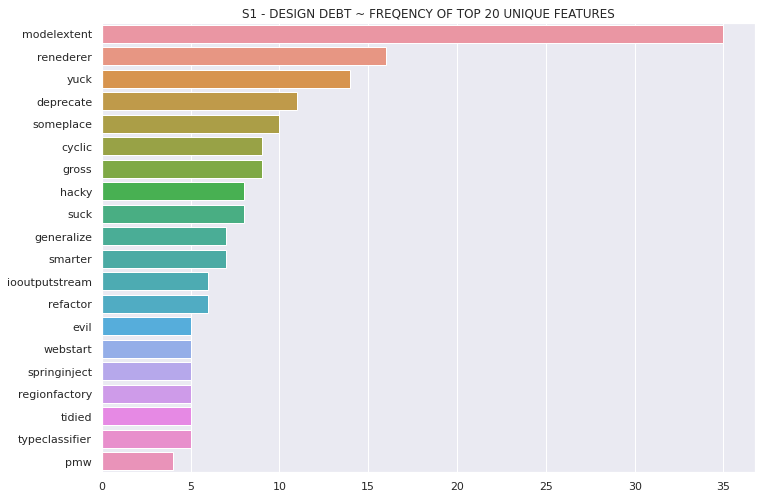

In [89]:
import seaborn as sns
design_td_unique_top_20 = sorted(design_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

design_td_unique_top_20_dict=dict(design_td_unique_top_20)
names = list(design_td_unique_top_20_dict.keys())
values = list(design_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S1 - DESIGN DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S1 - DESIGN DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

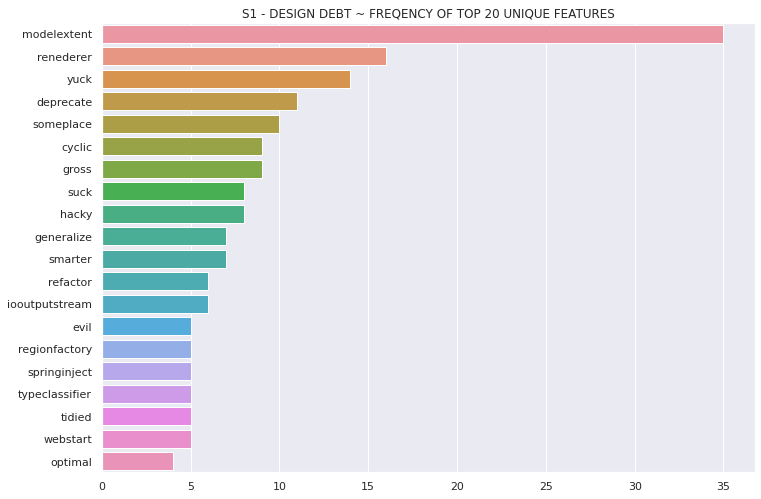

In [75]:
import seaborn as sns
design_td_unique_top_20 = sorted(design_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

design_td_unique_top_20_dict=dict(design_td_unique_top_20)
names = list(design_td_unique_top_20_dict.keys())
values = list(design_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S1 - DESIGN DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S2 - IMPLEMENTATION DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

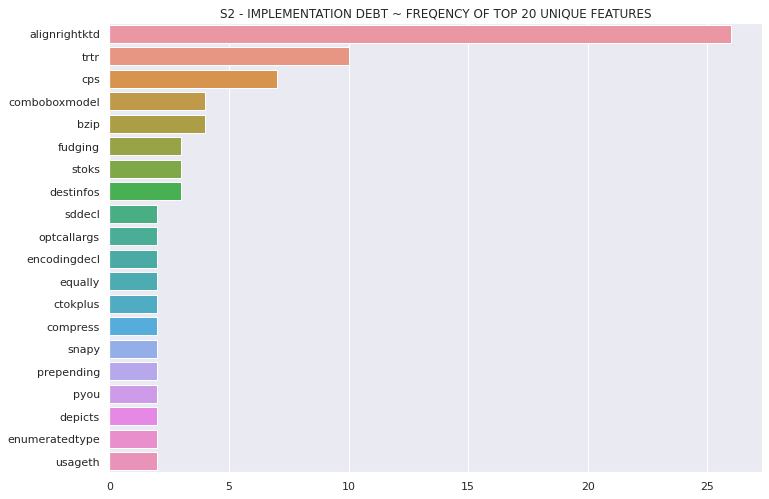

In [76]:
import seaborn as sns
impl_td_unique_top_20 = sorted(impl_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

impl_td_unique_top_20_dict=dict(impl_td_unique_top_20)
names = list(impl_td_unique_top_20_dict.keys())
values = list(impl_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S2 - IMPLEMENTATION DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S3 - DEFECT DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

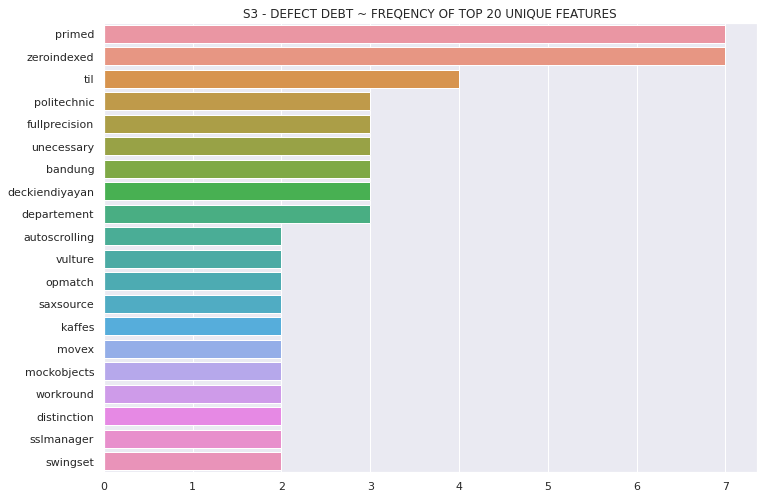

In [77]:
import seaborn as sns
defect_td_unique_top_20 = sorted(defect_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

defect_td_unique_top_20_dict=dict(defect_td_unique_top_20)
names = list(defect_td_unique_top_20_dict.keys())
values = list(defect_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S3 - DEFECT DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S4 - TEST DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

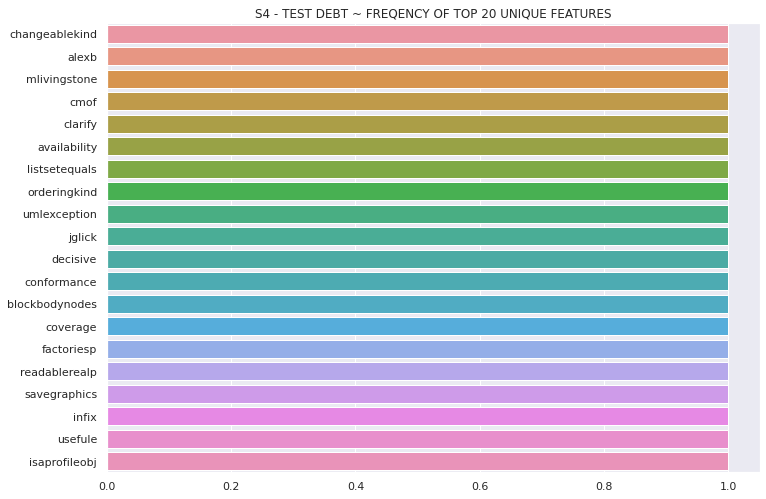

In [78]:
import seaborn as sns
test_td_unique_top_20 = sorted(test_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

test_td_unique_top_20_dict=dict(test_td_unique_top_20)
names = list(test_td_unique_top_20_dict.keys())
values = list(test_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S4 - TEST DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S5 - DOCUMENTATION DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

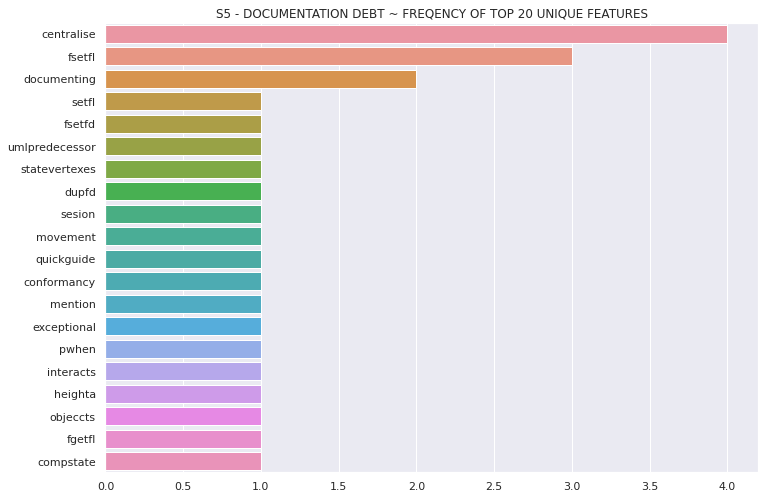

In [79]:
import seaborn as sns
doc_td_unique_top_20 = sorted(doc_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

doc_td_unique_top_20_dict=dict(doc_td_unique_top_20)
names = list(doc_td_unique_top_20_dict.keys())
values = list(doc_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S5 - DOCUMENTATION DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'S6 - NON-TECHNICAL DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

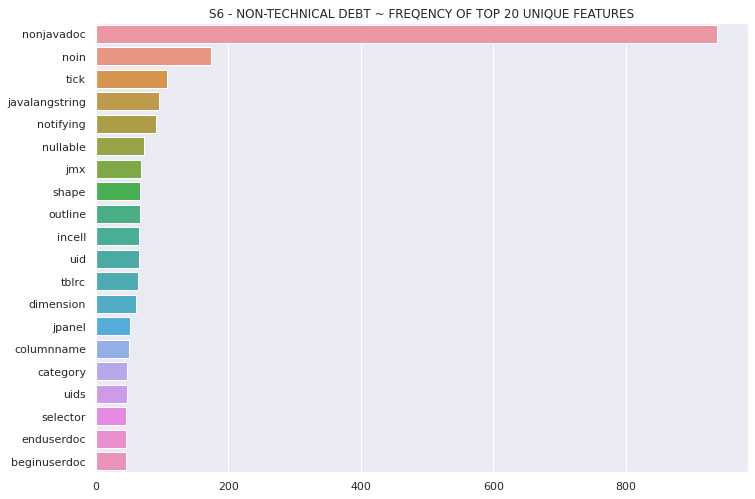

In [80]:
import seaborn as sns
non_td_unique_top_20 = sorted(non_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

non_td_unique_top_20_dict=dict(non_td_unique_top_20)
names = list(non_td_unique_top_20_dict.keys())
values = list(non_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names ).set_title("S6 - NON-TECHNICAL DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


In [81]:
import pandas as pd

des_feat_df=pd.DataFrame({'design_td_uniq':list(design_td_unique_words)})
impls_feat_df=pd.DataFrame({'impl_td_uniq':list(impl_td_unique_words)})
defect_feat_df=pd.DataFrame({'defect_td_uniq':list(defect_td_unique_words)})
non_feat_df=pd.DataFrame({'non_td_uniq':list(non_td_unique_words)})
test_feat_df=pd.DataFrame({'test_td_uniq':list(test_td_unique_words)})
doc_feat_df=pd.DataFrame({'doc_td_uniq':list(doc_td_unique_words)})
common_feat_df=pd.DataFrame({'common_td_uniq':list(common_term_freq)})




uniq_feat_df=pd.concat([des_feat_df,impls_feat_df,defect_feat_df,non_feat_df,test_feat_df,doc_feat_df,common_feat_df], ignore_index=True, axis=1)
uniq_feat_df.to_csv('/content/drive/My Drive/tech_debt/nlp_proj_spec_2_uniq_feat_db.csv',encoding='latin-1')




In [107]:
all_uniq_feat_list=[]
all_uniq_feat_list.extend(design_td_unique_words)
all_uniq_feat_list.extend(impl_td_unique_words)
all_uniq_feat_list.extend(defect_td_unique_words)
all_uniq_feat_list.extend(non_td_unique_words)
all_uniq_feat_list.extend(test_td_unique_words)
all_uniq_feat_list.extend(doc_td_unique_words)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'S6 - NON-TECHNICAL DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

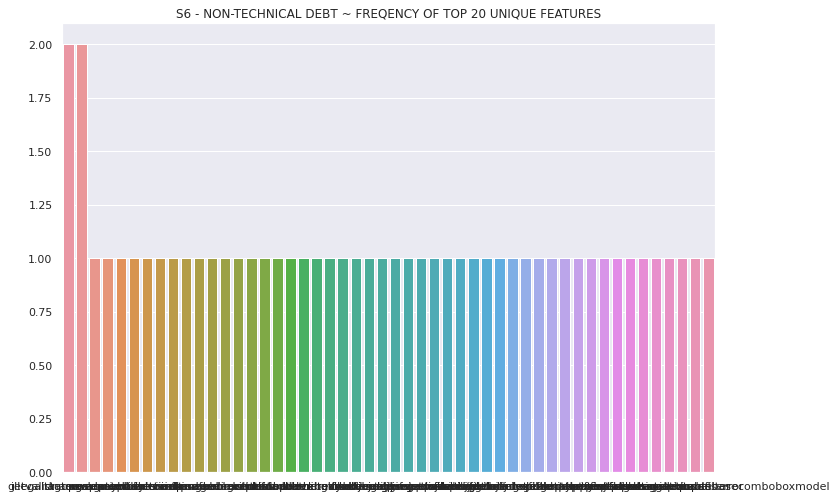

In [ ]:
import seaborn as sns
non_td_unique_top_20 = sorted(test_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:50]

non_td_unique_top_20_dict=dict(non_td_unique_top_20)
names = list(non_td_unique_top_20_dict.keys())
values = list(non_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(names,values ).set_title("S6 - NON-TECHNICAL DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'S6 - NON-TECHNICAL DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES')

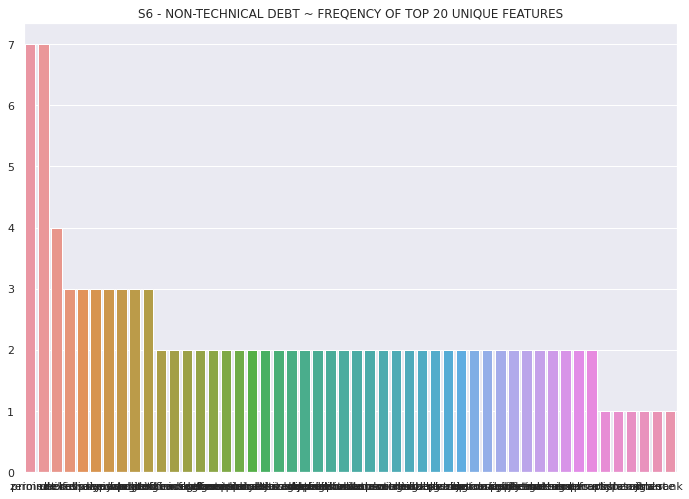

In [ ]:
import seaborn as sns
non_td_unique_top_20 = sorted(defect_td_unique_freq.items(), key=lambda k_v: k_v[1], reverse=True)[:50]

non_td_unique_top_20_dict=dict(non_td_unique_top_20)
names = list(non_td_unique_top_20_dict.keys())
values = list(non_td_unique_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(names,values ).set_title("S6 - NON-TECHNICAL DEBT ~ FREQENCY OF TOP 20 UNIQUE FEATURES") # , orient='h')


In [82]:
 design_td_unique_freq = { term : design_td_term_freq.get(term) for term in design_td_unique_words }
 impl_td_unique_freq = { term : impl_td_term_freq.get(term) for term in impl_td_unique_words }
 defect_td_unique_freq = { term : defect_td_term_freq.get(term) for term in defect_td_unique_words }
 test_td_unique_freq = { term : test_td_term_freq.get(term) for term in test_td_unique_words }
 doc_td_unique_freq = { term : doc_td_term_freq.get(term) for term in doc_td_unique_words }
 non_td_unique_freq = { term : non_td_term_freq.get(term) for term in non_td_unique_words }

Text(0, 0.5, 'Frequency')

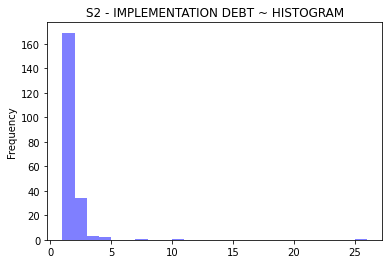

In [76]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

x =list(impl_td_unique_freq.values())
#num_bins = 
n, bins, patches = plt.hist(x, 25, facecolor='blue', alpha=0.5)
plt.title('S2 - IMPLEMENTATION DEBT ~ HISTOGRAM')
#plt.xlabel('Words')
plt.ylabel('Frequency')
#plt.show()

Text(0, 0.5, 'Frequency')

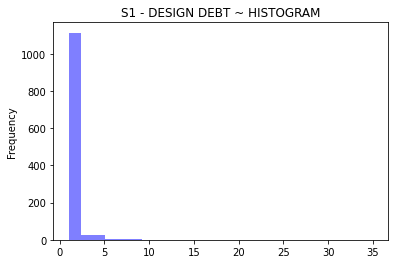

In [77]:
x =list(design_td_unique_freq.values())
#print(x)
#num_bins = 
n, bins, patches = plt.hist(x, 25, facecolor='blue', alpha=0.5)
plt.title('S1 - DESIGN DEBT ~ HISTOGRAM')
#plt.xlabel('# of words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

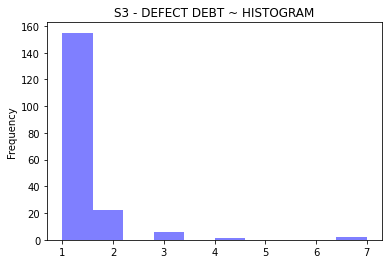

In [78]:
x =list(defect_td_unique_freq.values())
#print(x)
#num_bins = 
n, bins, patches = plt.hist(x, 10, facecolor='blue', alpha=0.5)
plt.title('S3 - DEFECT DEBT ~ HISTOGRAM')
#plt.xlabel('# of words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

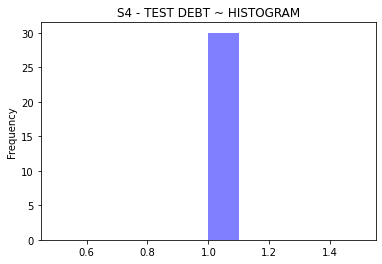

In [79]:
x =list(test_td_unique_freq.values())
#print(x)
#num_bins = 
n, bins, patches = plt.hist(x, 10, facecolor='blue', alpha=0.5)
plt.title('S4 - TEST DEBT ~ HISTOGRAM')
#plt.xlabel('# of words')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

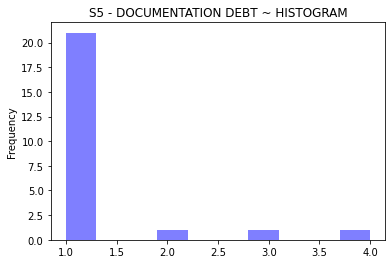

In [80]:
x =list(doc_td_unique_freq.values())
#print(x)
#num_bins = 
n, bins, patches = plt.hist(x, 10, facecolor='blue', alpha=0.5)
plt.title('S5 - DOCUMENTATION DEBT ~ HISTOGRAM')
#plt.xlabel('# of words')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

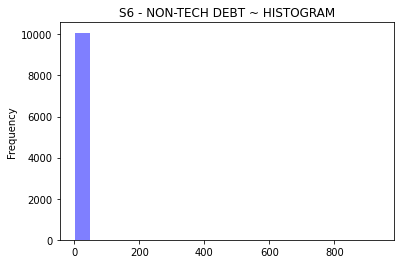

In [85]:
x =list(non_td_unique_freq.values())
#print(x)
#num_bins = 
n, bins, patches = plt.hist(x, 20, facecolor='blue', alpha=0.5)
plt.title('S6 - NON-TECH DEBT ~ HISTOGRAM')
#plt.xlabel('# of words')
plt.ylabel('Frequency')

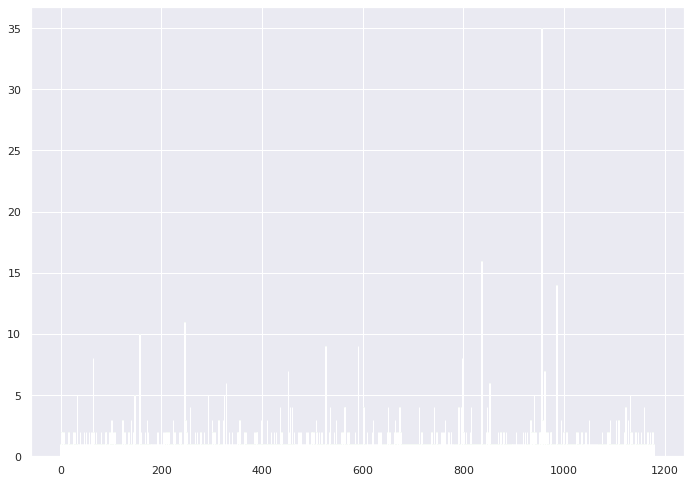

In [83]:
import matplotlib.pyplot as plt
indexes = np.arange(len(design_td_unique_freq.keys()))
plt.bar(indexes, design_td_unique_freq.values(),color="green")
plt.show()

In [101]:
type(all_td_count_data)

scipy.sparse.csr.csr_matrix

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import numpy as np

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')# Fit and transform the processed titles

all_td_count_data = count_vectorizer.fit_transform(all_data_clean['commenttext'])
#defect_count_data = count_vectorizer.fit_transform(defect_feat_df['defect_td_uniq'])

        
# Tweak the two parameters below
number_topics = 6
number_words = 20

# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(all_td_count_data)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [88]:
def lda_topic_matching_all_td(topic_num,lda_topic_words_set):
  defect_td_matching_cnt=0
  design_td_matching_cnt=0
  doc_td_matching_cnt=0
  test_td_matching_cnt=0
  impl_td_matching_cnt=0
  non_td_matching_cnt=0

  for keyword in lda_topic_words_set:
    if keyword in defect_td_top_20_dict:
      defect_td_matching_cnt+=1
	
    if keyword in design_td_top_20_dict:
      design_td_matching_cnt+=1

    if keyword in doc_td_top_20:
      doc_td_matching_cnt+=1

    if keyword in test_td_top_20:
      test_td_matching_cnt+=1	
	
    if keyword in impl_td_top_20:
      impl_td_matching_cnt+=1	

    if keyword in non_td_top_20:
      non_td_matching_cnt+=1	


  print("Topic {} - Matching percentage with top 20 S1 Design TD features {}".format(topic_num,(design_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 S2 Implementation TD features {}".format(topic_num,(impl_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 S3 Defect TD features {}".format(topic_num,(defect_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 S4 Test TD features {}".format(topic_num,(test_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 S5 Documentation TD features {}".format(topic_num,(doc_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 S6 Non-TD features {}".format(topic_num,(non_td_matching_cnt/20)))



In [89]:
def print_all_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        feat_set={}
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        feat_set={ words[i] for i in topic.argsort()[:-n_top_words - 1:-1] }

        all_topic_feat_set_list.append(feat_set)
        lda_topic_matching_all_td(topic_idx+1,feat_set)

In [97]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_all_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
new return start array change add list path create check collection folder selected key object element need remove search number
Topic 1 - Matching percentage with top 20 S1 Design TD features 0.15
Topic 1 - Matching percentage with top 20 S2 Implementation TD features 0.0
Topic 1 - Matching percentage with top 20 S3 Defect TD features 0.1
Topic 1 - Matching percentage with top 20 S4 Test TD features 0.0
Topic 1 - Matching percentage with top 20 S5 Documentation TD features 0.0
Topic 1 - Matching percentage with top 20 S6 Non-TD features 0.0

Topic #1:
method value byte nonjavadoc test variable static process instance public exception interface field code color throw final copied button save
Topic 2 - Matching percentage with top 20 S1 Design TD features 0.1
Topic 2 - Matching percentage with top 20 S2 Implementation TD features 0.0
Topic 2 - Matching percentage with top 20 S3 Defect TD features 0.15
Topic 2 - Matching percentage with top 20 S4 Test TD 

In [98]:

def lda_topic_matching_uniq_td(topic_num,lda_topic_words_set):
  defect_td_matching_cnt=0
  design_td_matching_cnt=0
  doc_td_matching_cnt=0
  test_td_matching_cnt=0
  impl_td_matching_cnt=0
  non_td_matching_cnt=0

  for keyword in lda_topic_words_set:
    if keyword in defect_td_unique_top_20_dict:
      defect_td_matching_cnt+=1
	
    if keyword in design_td_unique_top_20_dict:
      design_td_matching_cnt+=1

    if keyword in doc_td_unique_top_20_dict:
      doc_td_matching_cnt+=1

    if keyword in test_td_unique_top_20_dict:
      test_td_matching_cnt+=1	
	
    if keyword in impl_td_unique_top_20_dict:
      impl_td_matching_cnt+=1	

    if keyword in non_td_unique_top_20_dict:
      non_td_matching_cnt+=1	


  print("Topic {} - Matching percentage with top 20 unique S1 Design TD features {}".format(topic_num,(design_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 unique S2 Implementation TD features {}".format(topic_num,(impl_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 unique S3 Defect TD features {}".format(topic_num,(defect_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 unique S4 Test TD features {}".format(topic_num,(test_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 unique S5 Documentation TD features {}".format(topic_num,(doc_td_matching_cnt/20)))
  print("Topic {} - Matching percentage with top 20 unique S6 Non-TD features {}".format(topic_num,(non_td_matching_cnt/20)))



In [116]:
uniq_topic_feat_set_list=[]
def print_uniq_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        feat_set={}
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        feat_set={ words[i] for i in topic.argsort()[:-n_top_words - 1:-1] }

        uniq_topic_feat_set_list.append(feat_set)
        lda_topic_matching_uniq_td(topic_idx+1,feat_set)

In [117]:
uniq_td_count_data = count_vectorizer.fit_transform(all_uniq_feat_list)
#defect_count_data = count_vectorizer.fit_transform(defect_feat_df['defect_td_uniq'])

        
# Tweak the two parameters below
number_topics = 6
number_words = 20

# Create and fit the LDA model
lda_uniq = LDA(n_components=number_topics, n_jobs=-1)
lda_uniq.fit(uniq_td_count_data)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [118]:
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_uniq_topics(lda_uniq, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
fgblack interpreting rangeaxes kbsec resourceset sqlbookmark hashmaps recheck setresizepos builtin paintborder sourcemodule removetoolbar sqrtsquard getvalueformat enviroment retrieving depencency supplying buildfiletest
Topic 1 - Matching percentage with top 20 unique S1 Design TD features 0.0
Topic 1 - Matching percentage with top 20 unique S2 Implementation TD features 0.0
Topic 1 - Matching percentage with top 20 unique S3 Defect TD features 0.0
Topic 1 - Matching percentage with top 20 unique S4 Test TD features 0.0
Topic 1 - Matching percentage with top 20 unique S5 Documentation TD features 0.0
Topic 1 - Matching percentage with top 20 unique S6 Non-TD features 0.0

Topic #1:
xvalue libc monthchangecmd ffffef sanity inclf tableswitch sortedresults usedmemory loglevel isprimitive getminimumsize impored josh pkfk tx statusupdate woops timelow getpluginjars
Topic 2 - Matching percentage with top 20 unique S1 Design TD features 0.0
Topic 2 - Matching

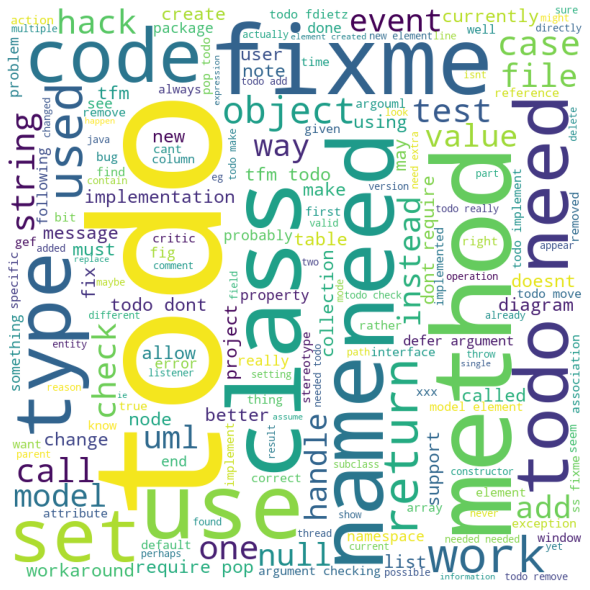

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

td_src_cd_comments=''
non_td_src_cd_comments=''
for val in td_data_clean['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    td_src_cd_comments += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(td_src_cd_comments) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<class 'str'>


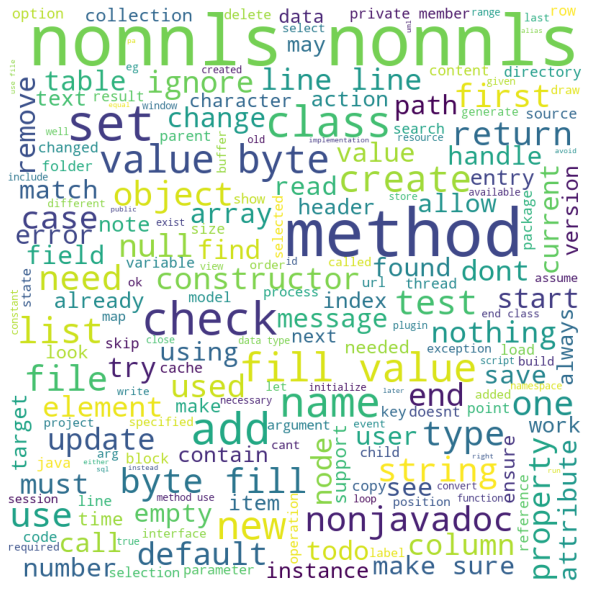

In [ ]:
for val in non_td_data_clean['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    non_td_src_cd_comments += " ".join(tokens)+" "

print(type(non_td_src_cd_comments))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(non_td_src_cd_comments) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<class 'str'>


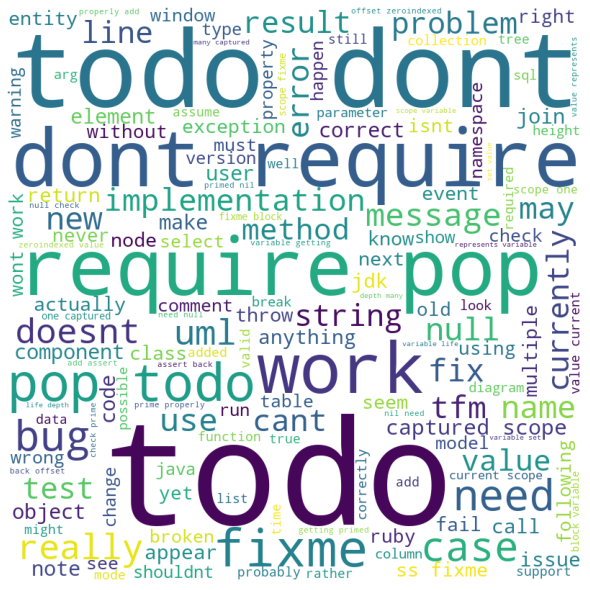

In [ ]:

print(type(defect_td_src_cd_cmnts))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(defect_td_src_cd_cmnts) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


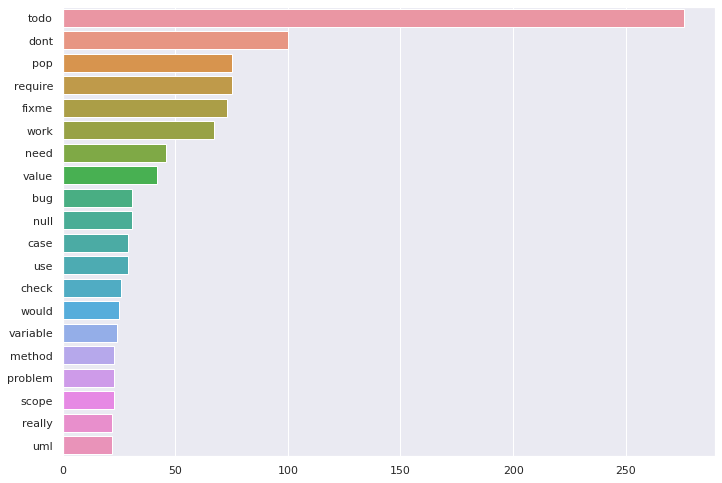

In [91]:
import collections
import seaborn as sns
defect_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        defect_td_wordcount[word] += 1 
defect_td_top_20 = sorted(defect_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

defect_td_top_20_dict=dict(defect_td_top_20)
names = list(defect_td_top_20_dict.keys())
values = list(defect_td_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names )# , orient='h')


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


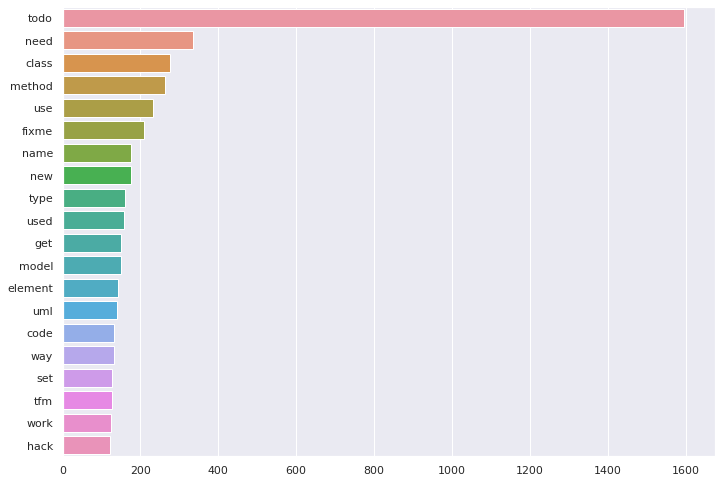

In [92]:
design_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        design_td_wordcount[word] += 1 
design_td_top_20 = sorted(design_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

design_td_top_20_dict=dict(design_td_top_20)
names = list(design_td_top_20_dict.keys())
values = list(design_td_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names )

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


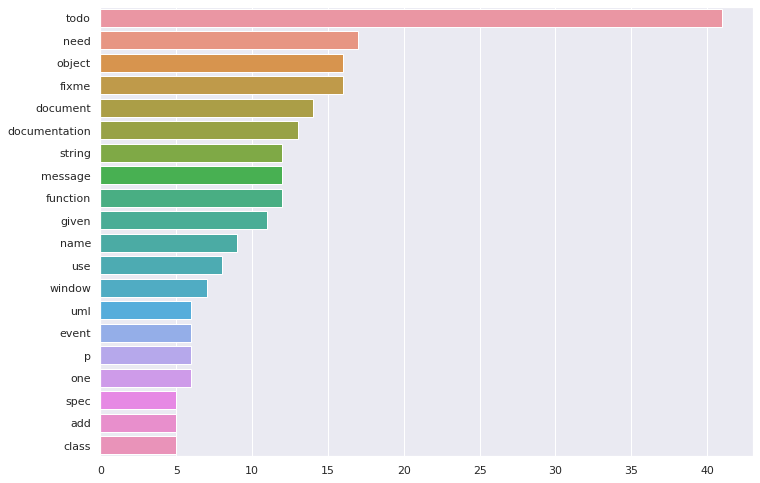

In [93]:
doc_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        doc_td_wordcount[word] += 1 
doc_td_top_20 = sorted(doc_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

doc_td_top_20_dict=dict(doc_td_top_20)
names = list(doc_td_top_20_dict.keys())
values = list(doc_td_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names )

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


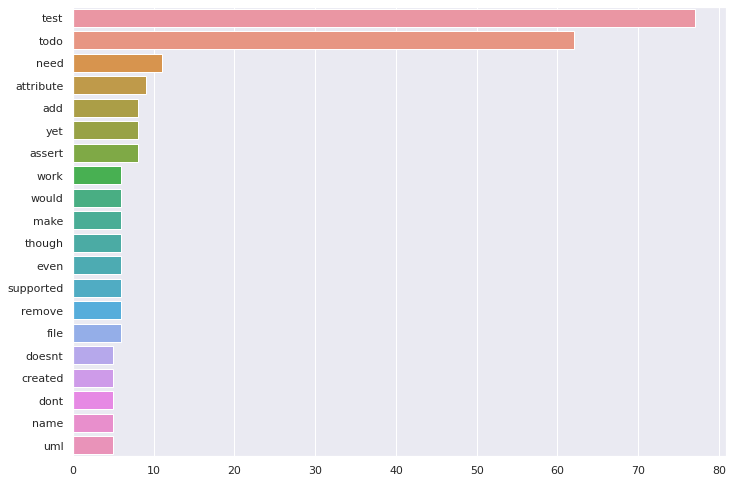

In [94]:
test_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'TEST')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        test_td_wordcount[word] += 1 
test_td_top_20 = sorted(test_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

test_td_top_20_dict=dict(test_td_top_20)
names = list(test_td_top_20_dict.keys())
values = list(test_td_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names )

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


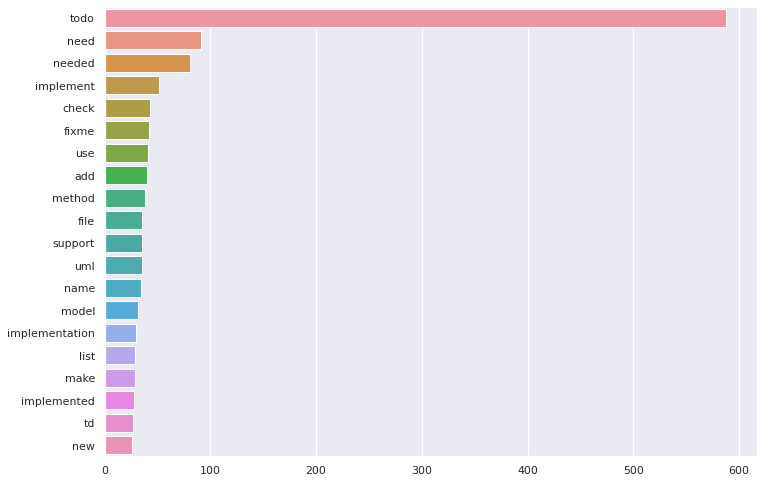

In [95]:
impl_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        impl_td_wordcount[word] += 1 
impl_td_top_20 = sorted(impl_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

impl_td_top_20_dict=dict(impl_td_top_20)
names = list(impl_td_top_20_dict.keys())
values = list(impl_td_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names )

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


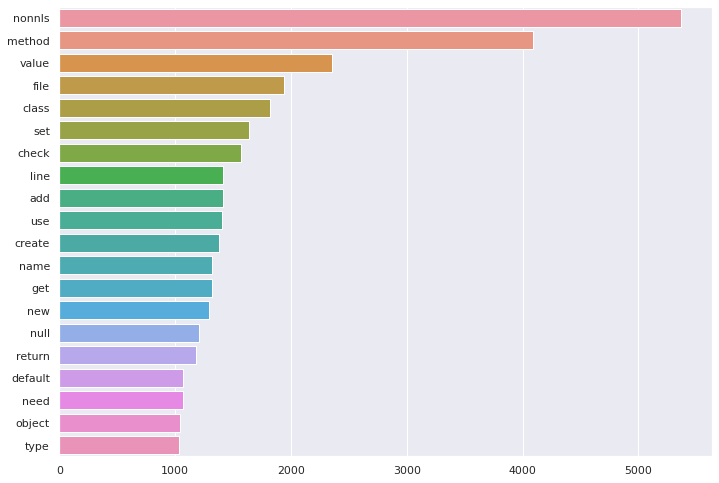

In [96]:
non_td_wordcount = collections.defaultdict(int)

for val in non_td_data_clean['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        non_td_wordcount[word] += 1 
non_td_top_20 = sorted(non_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

non_td_top_20_dict=dict(non_td_top_20)
names = list(non_td_top_20_dict.keys())
values = list(non_td_top_20_dict.values())
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(values,names )

<class 'str'>


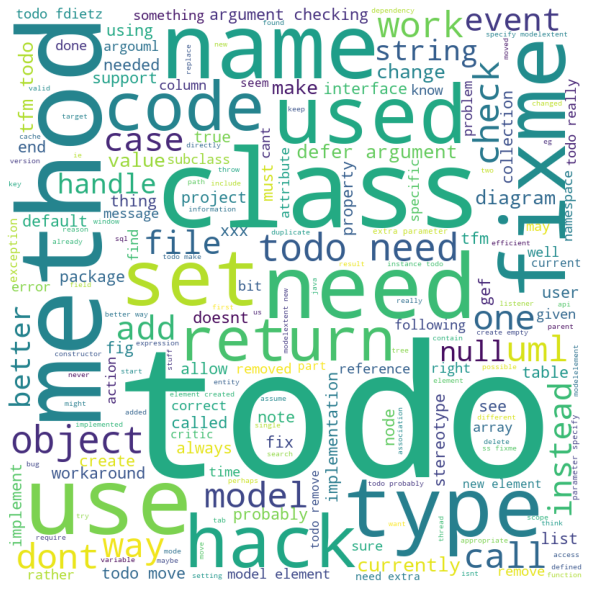

In [ ]:


print(type(design_td_src_cd_cmnts))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(design_td_src_cd_cmnts) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


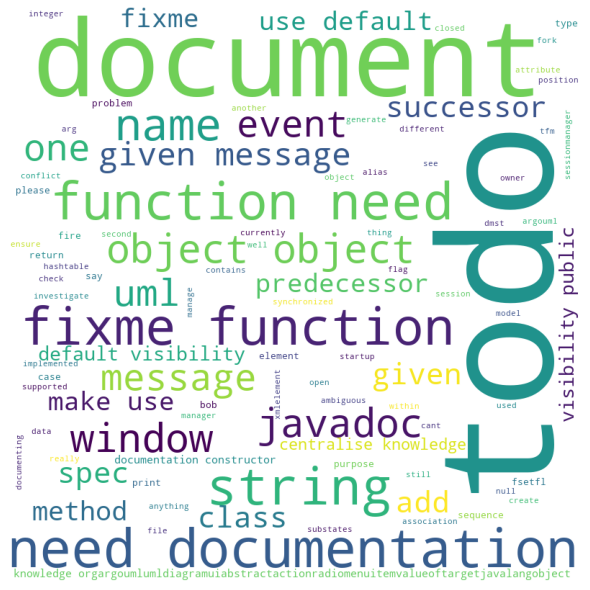

In [ ]:


#print(type(doc_td_src_cd_cmnts))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(doc_td_src_cd_cmnts) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


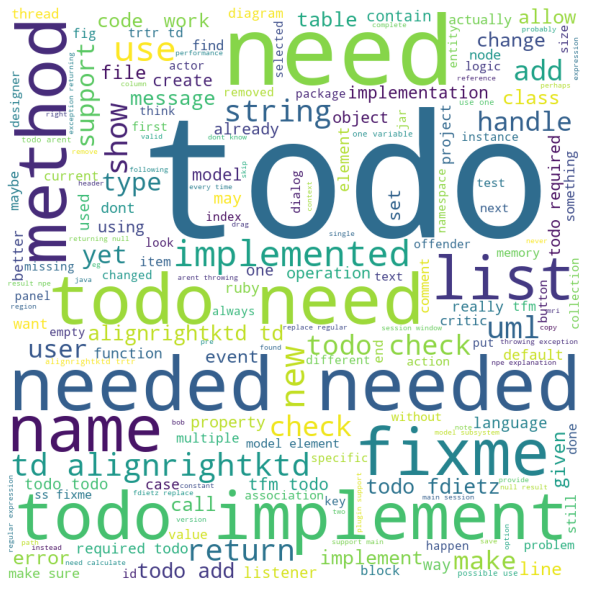

In [ ]:


#print(type(doc_td_src_cd_cmnts))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(impl_td_src_cd_cmnts) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


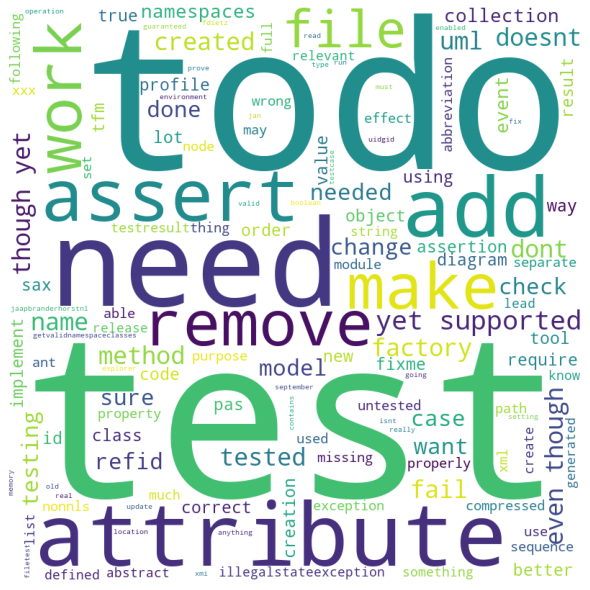

In [ ]:
test_td_src_cd_cmnts=''
for val in td_data_clean.loc[(td_data_clean['classification'] == 'TEST')]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
    test_td_src_cd_cmnts += " ".join(tokens)+" "

#print(type(doc_td_src_cd_cmnts))
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(test_td_src_cd_cmnts) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 


In [ ]:

td_data_clean.insert(0, 'ID', range(100, 100 + len(td_data_clean)))
td_data_clean.to_csv('/content/drive/My Drive/tech_debt/td_for_sentistrength.tsv', sep = '\t',encoding='latin-1')

non_td_data_clean.insert(0, 'ID', range(100, 100 + len(non_td_data_clean)))
non_td_data_clean.to_csv('/content/drive/My Drive/tech_debt/non_td_for_sentistrength.tsv', sep = '\t',encoding='latin-1')

In [ ]:
td_senti_strength_rslts_df = pd.read_csv('/content/drive/My Drive/tech_debt/td_for_sentistrength_classID.tsv',sep = '\t',names=["ID","pos_score", "neg_score"])#'utf-8')
non_td_senti_strength_rslts_df = pd.read_csv('/content/drive/My Drive/tech_debt/non_td_for_sentistrength_classID.tsv',sep = '\t',names=["ID","pos_score", "neg_score"])

In [ ]:
print(len(td_senti_strength_rslts_df))
print(len(non_td_senti_strength_rslts_df))

4071
58173


In [ ]:
td_senti_strength_rslts_df['binary_result'] =  td_senti_strength_rslts_df[['pos_score', 'neg_score']].sum(axis=1)
non_td_senti_strength_rslts_df['binary_result']=  non_td_senti_strength_rslts_df[['pos_score', 'neg_score']].sum(axis=1)

In [ ]:
td_senti_strength_rslts_df.loc[td_senti_strength_rslts_df.binary_result <= -1,'binary_sentiment']=int(1)
td_senti_strength_rslts_df.loc[td_senti_strength_rslts_df.binary_result > 0, 'binary_sentiment']=int(0)
td_senti_strength_rslts_df.loc[td_senti_strength_rslts_df.binary_result == 0, 'binary_sentiment']=int(-1)
#td_senti_strength_rslts_df['binary_sentiment']=LabelEncoder().fit_transform(td_senti_strength_rslts_df.binary_sentiment)


non_td_senti_strength_rslts_df.loc[non_td_senti_strength_rslts_df.binary_result <= -1,'binary_sentiment']=int(1)
non_td_senti_strength_rslts_df.loc[non_td_senti_strength_rslts_df.binary_result > 0, 'binary_sentiment']=int(0)
non_td_senti_strength_rslts_df.loc[non_td_senti_strength_rslts_df.binary_result== 0, 'binary_sentiment']=int(-1)
#non_td_senti_strength_rslts_df['binary_sentiment']=LabelEncoder().fit_transform(non_td_senti_strength_rslts_df.binary_sentiment)

In [ ]:
len(td_data_clean.loc[(td_data_clean['binary_sentiment']==1 )])

856

In [ ]:
td_senti_strength_rslts_df['binary_result']

0       0
1       0
2      -3
3      -3
4       0
       ..
4066    1
4067    0
4068    1
4069   -2
4070    0
Name: binary_result, Length: 4071, dtype: int64

In [ ]:
#tech_debt_df['binary_result']=td_senti_strength_rslts_df['binary_result']
td_data_clean['pos_score']=td_senti_strength_rslts_df['pos_score'].values
td_data_clean['neg_score']=td_senti_strength_rslts_df['neg_score'].values
td_data_clean['binary_sentiment']=td_senti_strength_rslts_df['binary_sentiment'].values
td_data_clean['overall_score']=td_senti_strength_rslts_df['binary_result'].values


non_td_data_clean['pos_score']=non_td_senti_strength_rslts_df['pos_score'].values
non_td_data_clean['neg_score']=non_td_senti_strength_rslts_df['neg_score'].values
non_td_data_clean['binary_sentiment']=non_td_senti_strength_rslts_df['binary_sentiment'].values
non_td_data_clean['overall_score']=non_td_senti_strength_rslts_df['binary_result'].values

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
td_senti_strength_rslts_df.head()

,ID,pos_score,neg_score,binary_result,binary_sentiment
0,100,1,-1,0,0
1,101,2,-2,0,0
2,102,1,-4,-3,1
3,103,1,-4,-3,1
4,104,1,-1,0,0


In [ ]:
 ovrall_score_design = td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN')]['overall_score'].sum(axis=0)
 ovrall_score_defect = td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT')]['overall_score'].sum(axis=0)
 ovrall_score_doc = td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION')]['overall_score'].sum(axis=0)
 ovrall_score_test = td_data_clean.loc[(td_data_clean['classification'] == 'TEST')]['overall_score'].sum(axis=0)
 ovrall_score_impl = td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION')]['overall_score'].sum(axis=0)
 ovrall_score_nontd = non_td_data_clean.loc[(non_td_data_clean['classification'] == 'WITHOUT_CLASSIFICATION')]['overall_score'].sum(axis=0)
 

In [ ]:
neg_def_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT') & (td_data_clean['binary_sentiment'] == 1)])
pos_def_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT') & (td_data_clean['binary_sentiment'] == 0)])
neu_def_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT') & (td_data_clean['binary_sentiment'] == -1)])
tot_def_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT')])

neg_des_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN') & (td_data_clean['binary_sentiment'] == 1)])
pos_des_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN') & (td_data_clean['binary_sentiment'] == 0)])
neu_des_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN') & (td_data_clean['binary_sentiment'] == -1)])
tot_des_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN')])

neg_doc_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION') & (td_data_clean['binary_sentiment'] == 1)])
pos_doc_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION') & (td_data_clean['binary_sentiment'] == 0)])
neu_doc_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION') & (td_data_clean['binary_sentiment'] == -1)])
tot_doc_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION')])

neg_impl_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION') & (td_data_clean['binary_sentiment'] == 1)])
pos_impl_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION') & (td_data_clean['binary_sentiment'] == 0)])
neu_impl_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION') & (td_data_clean['binary_sentiment'] == -1)])
tot_impl_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION')])

neg_test_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'TEST') & (td_data_clean['binary_sentiment'] == 1)])
pos_test_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'TEST') & (td_data_clean['binary_sentiment'] == 0)])
neu_test_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'TEST') & (td_data_clean['binary_sentiment'] == -1)])
tot_test_td_cnt=len(td_data_clean.loc[(td_data_clean['classification'] == 'TEST')])

neg_non_td_cnt=len(non_td_data_clean.loc[(non_td_data_clean['classification'] == 'WITHOUT_CLASSIFICATION') & (non_td_data_clean['binary_sentiment'] == 1)])
pos_non_td_cnt=len(non_td_data_clean.loc[(non_td_data_clean['classification'] == 'WITHOUT_CLASSIFICATION') & (non_td_data_clean['binary_sentiment'] == 0)])
neu_non_td_cnt=len(non_td_data_clean.loc[(non_td_data_clean['classification'] == 'WITHOUT_CLASSIFICATION') & (non_td_data_clean['binary_sentiment'] == -1)])
tot_non_td_cnt=len(non_td_data_clean.loc[(non_td_data_clean['classification'] == 'WITHOUT_CLASSIFICATION')])



In [ ]:
tot_des_td_cnt

2703

In [ ]:
print("Average overall sentiment score & % negative sentiment for S6 category (NON TECH DEBT):{}  {}".format((ovrall_score_nontd/tot_non_td_cnt),round((neg_non_td_cnt/tot_non_td_cnt) *100),0))

Average overall sentiment score & % negative sentiment for S6 category (NON TECH DEBT):-0.01651969126570746  8


In [ ]:
print("Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S1 category (DESIGN DEBT):{},{},{},{}".format(round((ovrall_score_design/tot_des_td_cnt),2),round((pos_des_td_cnt/tot_des_td_cnt)*100,2),round((neu_des_td_cnt/tot_des_td_cnt)*100,2),round((neg_des_td_cnt/tot_des_td_cnt) *100,2)))
print("Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S2 category (IMPLEMENTATION DEBT):{},{},{},{}".format(round((ovrall_score_impl/tot_impl_td_cnt),2),round((pos_impl_td_cnt/tot_impl_td_cnt)*100,2),round((neu_impl_td_cnt/tot_impl_td_cnt)*100,2),round((neg_impl_td_cnt/tot_impl_td_cnt)*100,2)))
print("Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S3 category (DEFECT DEBT):{},{},{},{}".format(round((ovrall_score_defect/tot_def_td_cnt),2),round((pos_def_td_cnt/tot_def_td_cnt) *100,2),round((neu_def_td_cnt/tot_def_td_cnt) *100,2),round((neg_def_td_cnt/tot_def_td_cnt) *100,2)))
print("Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S4 category (TEST DEBT):{},{},{},{}".format(round((ovrall_score_test/tot_test_td_cnt),2),round((pos_test_td_cnt/tot_test_td_cnt) *100,2),round((neu_test_td_cnt/tot_test_td_cnt) *100,2),round((neg_test_td_cnt/tot_test_td_cnt) *100,2)))
print("Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S5 category (DOCUMENTATION DEBT):{},{},{},{}".format(round((ovrall_score_doc/tot_doc_td_cnt),2),round((pos_doc_td_cnt/tot_doc_td_cnt) *100,2),round((neu_doc_td_cnt/tot_doc_td_cnt) *100,2),round((neg_doc_td_cnt/tot_doc_td_cnt) *100,2)))
print("Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S6 category (NON TECH DEBT):{},{},{},{}".format(round((ovrall_score_nontd/tot_non_td_cnt),2),round((pos_non_td_cnt/tot_non_td_cnt) *100,2),round((neu_non_td_cnt/tot_non_td_cnt) *100,2),round((neg_non_td_cnt/tot_non_td_cnt) *100,2)))

Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S1 category (DESIGN DEBT):-0.13,13.1,63.08,23.83
Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S2 category (IMPLEMENTATION DEBT):0.01,10.96,79.26,9.78
Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S3 category (DEFECT DEBT):-0.16,11.44,64.41,24.15
Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S4 category (TEST DEBT):-0.02,18.82,64.71,16.47
Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S5 category (DOCUMENTATION DEBT):-0.13,5.56,75.93,18.52
Average overall sentiment score, %positive sentiment, %neutral, %negative sentiment for S6 category (NON TECH DEBT):-0.02,7.09,84.49,8.43


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


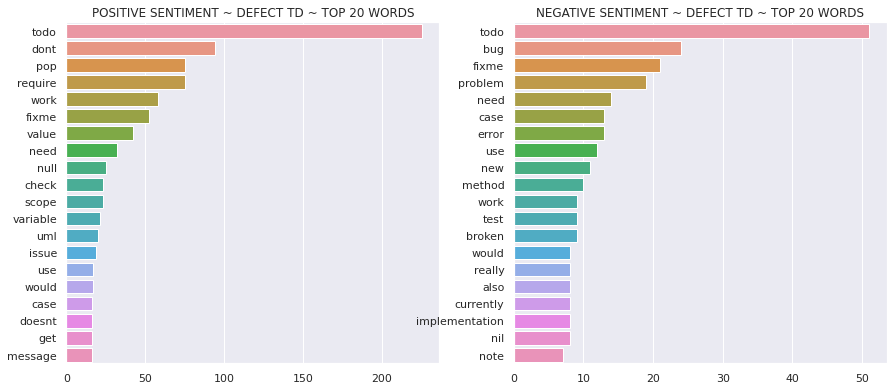

In [ ]:
defect_pos_td_wordcount = collections.defaultdict(int)
defect_neg_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT') & (td_data_clean['binary_sentiment'] == 1)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        defect_neg_td_wordcount[word] += 1 
defect_td_neg_top_20 = sorted(defect_neg_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DEFECT') & (td_data_clean['binary_sentiment'] == 0)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        defect_pos_td_wordcount[word] += 1 
defect_td_pos_top_20 = sorted(defect_pos_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

defect_td_pos_top_20_dict=dict(defect_td_pos_top_20)
pos_names = list(defect_td_pos_top_20_dict.keys())
pos_values = list(defect_td_pos_top_20_dict.values())

defect_td_neg_top_20_dict=dict(defect_td_neg_top_20)
neg_names = list(defect_td_neg_top_20_dict.keys())
neg_values = list(defect_td_neg_top_20_dict.values())

sns.set(rc={'figure.figsize':(14.7,6.27)})
fig, ax =plt.subplots(1,2)
sns.barplot(pos_values,pos_names, ax=ax[0] ).set_title("POSITIVE SENTIMENT ~ DEFECT TD ~ TOP 20 WORDS")# , orient='h')
sns.barplot(neg_values,neg_names, ax=ax[1] ).set_title("NEGATIVE SENTIMENT ~ DEFECT TD ~ TOP 20 WORDS")
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


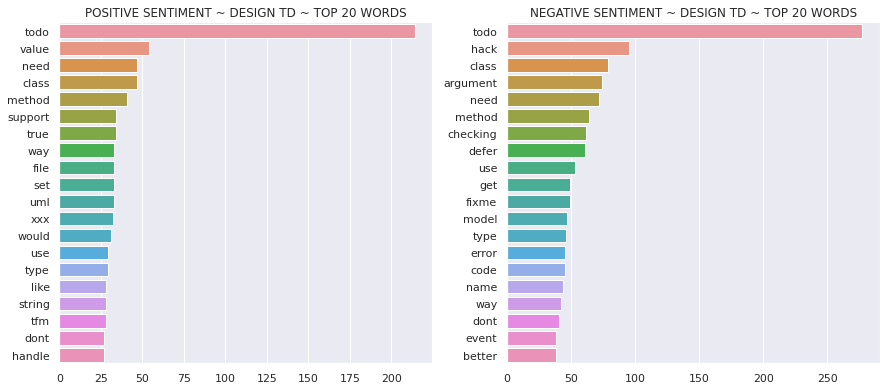

In [ ]:
design_pos_td_wordcount = collections.defaultdict(int)
design_neg_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN') & (td_data_clean['binary_sentiment'] == 1)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        design_neg_td_wordcount[word] += 1 
design_td_neg_top_20 = sorted(design_neg_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DESIGN') & (td_data_clean['binary_sentiment'] == 0)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        design_pos_td_wordcount[word] += 1 
design_td_pos_top_20 = sorted(design_pos_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

design_td_pos_top_20_dict=dict(design_td_pos_top_20)
pos_names = list(design_td_pos_top_20_dict.keys())
pos_values = list(design_td_pos_top_20_dict.values())

design_td_neg_top_20_dict=dict(design_td_neg_top_20)
neg_names = list(design_td_neg_top_20_dict.keys())
neg_values = list(design_td_neg_top_20_dict.values())

sns.set(rc={'figure.figsize':(14.7,6.27)})
fig, ax =plt.subplots(1,2)
sns.barplot(pos_values,pos_names, ax=ax[0] ).set_title("POSITIVE SENTIMENT ~ DESIGN TD ~ TOP 20 WORDS")# , orient='h')
sns.barplot(neg_values,neg_names, ax=ax[1] ).set_title("NEGATIVE SENTIMENT ~ DESIGN TD ~ TOP 20 WORDS")
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


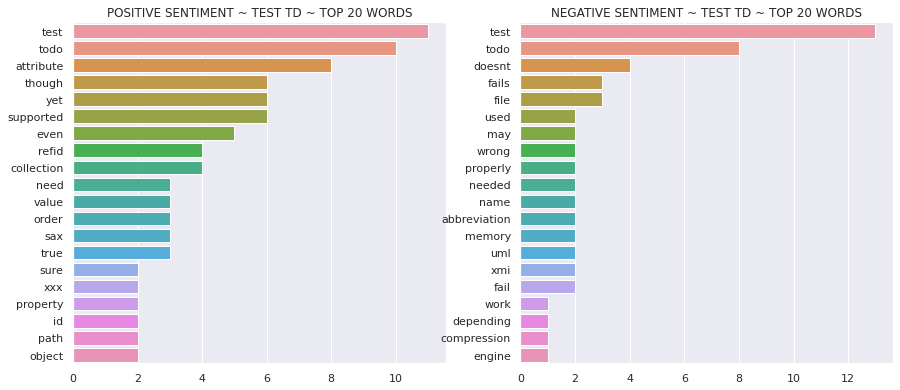

In [ ]:
test_pos_td_wordcount = collections.defaultdict(int)
test_neg_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'TEST') & (td_data_clean['binary_sentiment'] == 1)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        test_neg_td_wordcount[word] += 1 
test_td_neg_top_20 = sorted(test_neg_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

for val in td_data_clean.loc[(td_data_clean['classification'] == 'TEST') & (td_data_clean['binary_sentiment'] == 0)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        test_pos_td_wordcount[word] += 1 
test_td_pos_top_20 = sorted(test_pos_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

test_td_pos_top_20_dict=dict(test_td_pos_top_20)
pos_names = list(test_td_pos_top_20_dict.keys())
pos_values = list(test_td_pos_top_20_dict.values())

test_td_neg_top_20_dict=dict(test_td_neg_top_20)
neg_names = list(test_td_neg_top_20_dict.keys())
neg_values = list(test_td_neg_top_20_dict.values())

sns.set(rc={'figure.figsize':(14.7,6.27)})
fig, ax =plt.subplots(1,2)
sns.barplot(pos_values,pos_names, ax=ax[0] ).set_title("POSITIVE SENTIMENT ~ TEST TD ~ TOP 20 WORDS")# , orient='h')
sns.barplot(neg_values,neg_names, ax=ax[1] ).set_title("NEGATIVE SENTIMENT ~ TEST TD ~ TOP 20 WORDS")
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


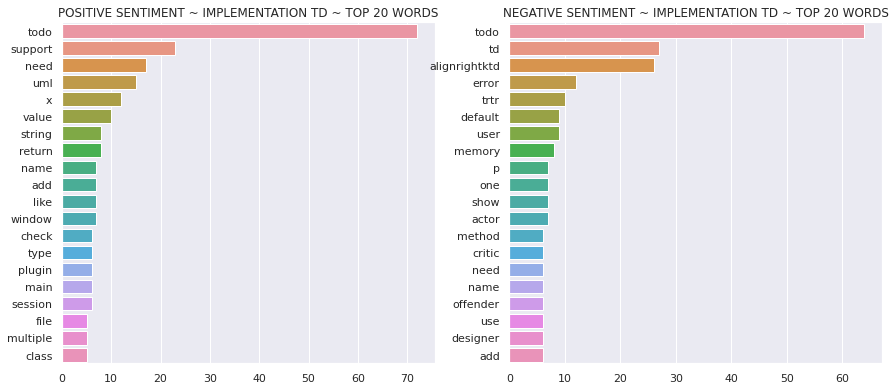

In [ ]:
impl_pos_td_wordcount = collections.defaultdict(int)
impl_neg_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION') & (td_data_clean['binary_sentiment'] == 1)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        impl_neg_td_wordcount[word] += 1 
impl_td_neg_top_20 = sorted(impl_neg_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

for val in td_data_clean.loc[(td_data_clean['classification'] == 'IMPLEMENTATION') & (td_data_clean['binary_sentiment'] == 0)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        impl_pos_td_wordcount[word] += 1 
impl_td_pos_top_20 = sorted(impl_pos_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

impl_td_pos_top_20_dict=dict(impl_td_pos_top_20)
pos_names = list(impl_td_pos_top_20_dict.keys())
pos_values = list(impl_td_pos_top_20_dict.values())

impl_td_neg_top_20_dict=dict(impl_td_neg_top_20)
neg_names = list(impl_td_neg_top_20_dict.keys())
neg_values = list(impl_td_neg_top_20_dict.values())

sns.set(rc={'figure.figsize':(14.7,6.27)})
fig, ax =plt.subplots(1,2)
sns.barplot(pos_values,pos_names, ax=ax[0] ).set_title("POSITIVE SENTIMENT ~ IMPLEMENTATION TD ~ TOP 20 WORDS")# , orient='h')
sns.barplot(neg_values,neg_names, ax=ax[1] ).set_title("NEGATIVE SENTIMENT ~ IMPLEMENTATION TD ~ TOP 20 WORDS")
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


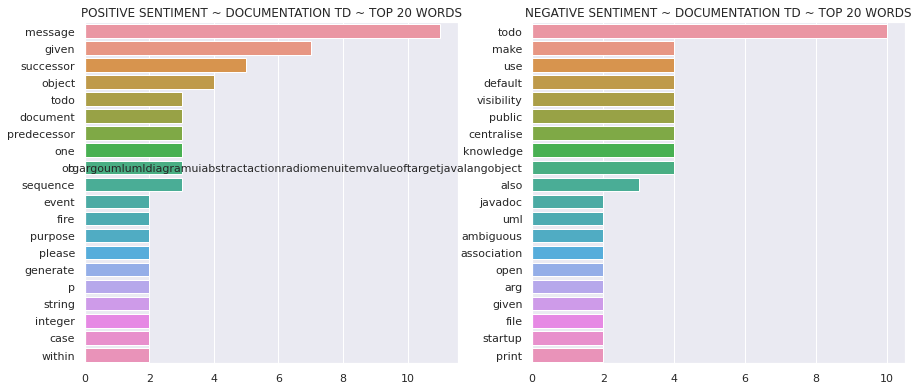

In [ ]:
doc_pos_td_wordcount = collections.defaultdict(int)
doc_neg_td_wordcount = collections.defaultdict(int)

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION') & (td_data_clean['binary_sentiment'] == 1)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        doc_neg_td_wordcount[word] += 1 
doc_td_neg_top_20 = sorted(doc_neg_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

for val in td_data_clean.loc[(td_data_clean['classification'] == 'DOCUMENTATION') & (td_data_clean['binary_sentiment'] == 0)]['commenttext']: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    words = val.split() 
    for word in words:
        doc_pos_td_wordcount[word] += 1 
doc_td_pos_top_20 = sorted(doc_pos_td_wordcount.items(), key=lambda k_v: k_v[1], reverse=True)[:20]

doc_td_pos_top_20_dict=dict(doc_td_pos_top_20)
pos_names = list(doc_td_pos_top_20_dict.keys())
pos_values = list(doc_td_pos_top_20_dict.values())

doc_td_neg_top_20_dict=dict(doc_td_neg_top_20)
neg_names = list(doc_td_neg_top_20_dict.keys())
neg_values = list(doc_td_neg_top_20_dict.values())

sns.set(rc={'figure.figsize':(14.7,6.27)})
fig, ax =plt.subplots(1,2)
sns.barplot(pos_values,pos_names, ax=ax[0] ).set_title("POSITIVE SENTIMENT ~ DOCUMENTATION TD ~ TOP 20 WORDS")# , orient='h')
sns.barplot(neg_values,neg_names, ax=ax[1] ).set_title("NEGATIVE SENTIMENT ~ DOCUMENTATION TD ~ TOP 20 WORDS")
fig.show()

In [ ]:
pip install empath

     |████████████████████████████████| 61kB 1.8MB/s 
  Created wheel for empath: filename=empath-0.89-cp36-none-any.whl size=57823 sha256=297386ce17e19585ced2dc87934b920adee0a90b605aa7910b13d7c90f701f9f
  Stored in directory: /root/.cache/pip/wheels/84/ea/2f/2bc54d4f9985ce61753ebc5b00cb2df51d855589267c667308
Successfully built empath


In [ ]:
from empath import Empath
lexicon = Empath()

In [ ]:
lexicon.analyze(doc_td_src_cd_cmnts, normalize=True)


{'achievement': 0.0015105740181268882,
 'affection': 0.0,
 'aggression': 0.0015105740181268882,
 'air_travel': 0.0015105740181268882,
 'alcohol': 0.0,
 'ancient': 0.0015105740181268882,
 'anger': 0.0,
 'animal': 0.0,
 'anonymity': 0.0,
 'anticipation': 0.0,
 'appearance': 0.0030211480362537764,
 'art': 0.0030211480362537764,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0030211480362537764,
 'business': 0.03323262839879154,
 'car': 0.0,
 'celebration': 0.00906344410876133,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.0015105740181268882,
 'clothing': 0.0015105740181268882,
 'cold': 0.0,
 'college': 0.00906344410876133,
 'communication': 0.03625377643504532,
 'competing': 0.0015105740181268882,
 'computer': 0.03172205438066465,
 'confusion': 0.0,
 'contentment': 0.0,
 'cooking': 0.0,
 'crime': 0.004531722054380665,
 'dance': 0.0,
 'death': 0.0,
 'deception': 0.0015105740181268882,
 'd

In [ ]:
lexicon.analyze(defect_td_src_cd_cmnts, normalize=True)


{'achievement': 0.0011902400317397343,
 'affection': 0.0,
 'aggression': 0.0009918666931164452,
 'air_travel': 0.0005951200158698671,
 'alcohol': 0.00039674667724657806,
 'ancient': 0.0019837333862328904,
 'anger': 0.00039674667724657806,
 'animal': 0.006744693513191827,
 'anonymity': 0.00039674667724657806,
 'anticipation': 0.0,
 'appearance': 0.0037690934338424917,
 'art': 0.00416584011108907,
 'attractive': 0.0005951200158698671,
 'banking': 0.0017853600476096013,
 'beach': 0.00039674667724657806,
 'beauty': 0.0013886133703630231,
 'blue_collar_job': 0.0,
 'body': 0.0021821067248561795,
 'breaking': 0.0053560801428288035,
 'business': 0.028169014084507043,
 'car': 0.0033723467565959135,
 'celebration': 0.007141440190438405,
 'cheerfulness': 0.0,
 'childish': 0.0005951200158698671,
 'children': 0.0019837333862328904,
 'cleaning': 0.004959333465582225,
 'clothing': 0.0,
 'cold': 0.0005951200158698671,
 'college': 0.018845467169212458,
 'communication': 0.0180519738147193,
 'competing'

In [ ]:
lexicon.analyze(design_td_src_cd_cmnts, normalize=True)


{'achievement': 0.0015058179329226558,
 'affection': 0.00013689253935660506,
 'aggression': 0.0008213552361396304,
 'air_travel': 0.0008555783709787816,
 'alcohol': 0.0006160164271047228,
 'ancient': 0.0014715947980835043,
 'anger': 0.00023956194387405886,
 'animal': 0.0015742642026009583,
 'anonymity': 0.0006844626967830253,
 'anticipation': 0.0,
 'appearance': 0.0030458590006844626,
 'art': 0.006947296372347707,
 'attractive': 0.0005817932922655715,
 'banking': 0.0018822724161533196,
 'beach': 0.00017111567419575633,
 'beauty': 0.0007529089664613279,
 'blue_collar_job': 0.00013689253935660506,
 'body': 0.0016084873374401095,
 'breaking': 0.0027720739219712527,
 'business': 0.022210814510609172,
 'car': 0.002532511978097194,
 'celebration': 0.0054072553045859005,
 'cheerfulness': 6.844626967830253e-05,
 'childish': 0.0007529089664613279,
 'children': 0.003559206023271732,
 'cleaning': 0.00595482546201232,
 'clothing': 0.002053388090349076,
 'cold': 0.0007186858316221766,
 'college': 0

In [ ]:
lexicon.analyze(test_td_src_cd_cmnts, normalize=True)


{'achievement': 0.0,
 'affection': 0.0,
 'aggression': 0.0,
 'air_travel': 0.0011792452830188679,
 'alcohol': 0.0,
 'ancient': 0.0023584905660377358,
 'anger': 0.0,
 'animal': 0.0023584905660377358,
 'anonymity': 0.003537735849056604,
 'anticipation': 0.0,
 'appearance': 0.0,
 'art': 0.01061320754716981,
 'attractive': 0.0,
 'banking': 0.0,
 'beach': 0.0,
 'beauty': 0.0011792452830188679,
 'blue_collar_job': 0.0,
 'body': 0.0,
 'breaking': 0.0023584905660377358,
 'business': 0.02240566037735849,
 'car': 0.0047169811320754715,
 'celebration': 0.00589622641509434,
 'cheerfulness': 0.0,
 'childish': 0.0,
 'children': 0.0,
 'cleaning': 0.009433962264150943,
 'clothing': 0.0011792452830188679,
 'cold': 0.0,
 'college': 0.00589622641509434,
 'communication': 0.01179245283018868,
 'competing': 0.0,
 'computer': 0.018867924528301886,
 'confusion': 0.0011792452830188679,
 'contentment': 0.0,
 'cooking': 0.0,
 'crime': 0.0011792452830188679,
 'dance': 0.0,
 'death': 0.0011792452830188679,
 'dece

In [ ]:
td_data_clean.head()

,index,ID,projectname,classification,commenttext,tag,pos_score,neg_score,binary_sentiment
0,0,100,apache-ant-1.7.0,DEFECT,fixme formatters threadsafe,1,1,-1,0
1,1,101,apache-ant-1.7.0,DEFECT,xxx jon skeet comment hasnt done already may s...,1,2,-2,0
2,2,102,apache-ant-1.7.0,DEFECT,hate admit dont know happened throw exception,1,1,-4,1
3,3,103,apache-ant-1.7.0,DEFECT,note starteam status new implies item local ma...,1,1,-4,1
4,4,104,apache-ant-1.7.0,DEFECT,generated classes must added generic jar buggy...,1,1,-1,0


In [ ]:
#groupby_td_cnt=td_data_clean.groupby(['classification','tag','binary_sentiment']).count()
#df.groupby('day')
td_data_clean.groupby('classification').count() # .filter(    lambda x : x['binary_sentiment'] == 1     )

,ID,projectname,commenttext,tag,pos_score,neg_score,binary_sentiment
classification,,,,,,,
DEFECT,472,472,472,472,472,472,472
DESIGN,2703,2703,2703,2703,2703,2703,2703
DOCUMENTATION,54,54,54,54,54,54,54
IMPLEMENTATION,757,757,757,757,757,757,757
TEST,85,85,85,85,85,85,85


In [ ]:
#td_with_sentiment_label_df = pd.read_csv('/content/drive/My Drive/tech_debt/td_with_sentiment.csv',header=0,encoding='latin-1')#'utf-8')

In [ ]:
del data_clean['binary_result']

In [ ]:
groupby_td=data_clean.groupby(['tag','classification','binary_sentiment'])
groupby_td.head()

,ID,projectname,classification,commenttext,tag,senti_result,binary_sentiment
0,100,apache-ant-1.7.0,DEFECT,fixme formatters threadsafe,1,0,0
1,101,apache-ant-1.7.0,DEFECT,xxx jon skeet comment hasnt done already may s...,1,0,0
2,102,apache-ant-1.7.0,DEFECT,hate admit dont know happened throw exception,1,-3,1
3,103,apache-ant-1.7.0,DEFECT,note starteam status new implies item local ma...,1,-3,1
4,104,apache-ant-1.7.0,DEFECT,generated classes must added generic jar buggy...,1,0,0
5,105,apache-ant-1.7.0,DEFECT,todo comment still relevant fixme need use sax...,1,0,0
6,106,apache-ant-1.7.0,DEFECT,turned temporarily appears bug selectorutilsma...,1,0,0
10,110,apache-ant-1.7.0,DEFECT,check first already loaded otherwise consecuti...,1,-1,1
11,111,apache-ant-1.7.0,DEFECT,todo warning line shows code contains variable...,1,-1,1
13,113,apache-ant-1.7.0,DESIGN,xxx really dont like xml processor still invol...,1,0,0


In [ ]:
groupby_td_cnt=data_clean.groupby(['classification','tag','binary_sentiment']).count()

In [ ]:
groupby_td_cnt.head()

ID  ...  senti_result
classification tag binary_sentiment        ...              
DEFECT         1   0                  358  ...           358
                   1                  114  ...           114
DESIGN         1   0                 2057  ...          2057
                   1                  644  ...           644
DOCUMENTATION  1   0                   44  ...            44

[5 rows x 4 columns]

In [ ]:
groupby_td_typ_senti_cnt=data_clean.groupby(['tag','binary_sentiment']).count()
groupby_td_typ_senti_cnt.head()

ID  projectname  ...  commenttext  senti_result
tag binary_sentiment                      ...                           
0   0                 48969        48969  ...        48969         48969
    1                  4902         4902  ...         4902          4902
1   0                  3213         3213  ...         3213          3213
    1                   856          856  ...          856           856

[4 rows x 5 columns]

In [ ]:
groupby_td_typ_senti_cnt=data_clean.groupby(['binary_sentiment','tag','classification']).count()
groupby_td_typ_senti_cnt.head()

ID  ...  senti_result
binary_sentiment tag classification                 ...              
0                0   WITHOUT_CLASSIFICATION  48969  ...         48969
                 1   DEFECT                    358  ...           358
                     DESIGN                   2057  ...          2057
                     DOCUMENTATION              44  ...            44
                     IMPLEMENTATION            683  ...           683

[5 rows x 4 columns]

In [ ]:
'''
import chart_studio.plotly as py
from plotly.graph_objs import *

trace1 = {
  "name": "All words", 
  "type": "histogram", 
  "x": list(defect_td_unique_words),
  "marker": {"line": {"color": "white", "width": 0 }, 
    "color": "rgb(114, 206, 243)"
  }, 
  "autobinx": True, 
  "histnorm": "count"
}


layout = {
  "font": {"family": "\"Droid Sans\", sans-serif"}, 
  "title": "Word frequency histogram", 
  "xaxis": {
    "type": "linear", 
    "title": "Words number", 
    "showgrid": False, 
    "showline": False, 
    "tickfont": {
      "size": 10, 
      "color": "black", 
      "family": "\"Verdana\", monospace"
    }, 
    "zeroline": False, 
    "autorange": True, 
    "gridcolor": "white", 
    "gridwidth": 1, 
    "titlefont": {
      "size": 12, 
      "color": "black", 
      "family": "\"Verdana\", monospace"
    }
  }, 
  "yaxis": {
    "type": "linear", 
    "ticks": "", 
    "title": "Number of docs", 
    "showgrid": True, 
    "tickfont": {
      "size": 10, 
      "color": "black", 
      "family": "\"Verdana\", monospace"
    }, 
    "zeroline": False, 
    "autorange": True, 
    "gridcolor": "white", 
    "gridwidth": 1, 
    "titlefont": {
      "size": 12, 
      "color": "black", 
      "family": "\"Verdana\", monospace"
    }
  }, 
  "bargap": 0, 
  "legend": {
    "x": 0.9240677966101696, 
    "y": 0.8966666666666667, 
    "bgcolor": "rgba(255, 255, 255, 0.75)", 
    "bordercolor": "rgba(0, 0, 0, 0)", 
    "borderwidth": 1
  }, 
  "margin": {
    "b": 60, 
    "l": 70, 
    "r": 40, 
    "t": 80, 
    "pad": 2
  }, 
  "barmode": "overlay", 
  "autosize": True, 
  "showlegend": True, 
  "bargroupgap": 0.1, 
  "plot_bgcolor": "rgb(213, 226, 233)", 
  "paper_bgcolor": "rgb(213, 226, 233)"
}
fig = Figure(data=list(defect_td_unique_words), layout=layout)
plot_url = py.plot(fig)
'''